In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df_raw=pd.read_csv("../raw_data/seoul_pub/소상공인시장진흥공단_상가(상권)정보_서울_202209.csv")

df = df_raw.copy()
# theme
# 유흥주점

# df_main : 유흥주점  상가 모음
df_main = df[df['상권업종중분류명']=='유흥주점']

column_using=['상호명','상권업종소분류명','행정동명','법정동명',
 '지번주소','도로명', '도로명주소','경도', '위도']
df_main=df_main.loc[:,column_using]
df_main.sample(10,random_state=1)

,상호명,상권업종소분류명,행정동명,법정동명,지번주소,도로명,도로명주소,경도,위도
273583,아리수포차,소주방/포장마차,반포3동,잠원동,서울특별시 서초구 잠원동 69-14,서울특별시 서초구 신반포로,"서울특별시 서초구 신반포로 205, (잠원동)",127.006447,37.507019
278869,더라이브센터,기타일반유흥주점,일원2동,일원동,서울특별시 강남구 일원동 615-1,서울특별시 강남구 개포로110길,"서울특별시 강남구 개포로110길 43, (일원동, 개포한신)",127.080318,37.491182
81857,큐브,호프/맥주,서원동,신림동,서울특별시 관악구 신림동 1637-8,서울특별시 관악구 신림로,"서울특별시 관악구 신림로 303, (신림동)",126.929730,37.481471
234913,역전할머니맥주,호프/맥주,능동,능동,서울특별시 광진구 능동 221-3,서울특별시 광진구 천호대로110길,"서울특별시 광진구 천호대로110길 28, (능동)",127.079499,37.556033
178220,쿨치킨호프,호프/맥주,상계3.4동,상계동,서울특별시 노원구 상계동 91-6,서울특별시 노원구 덕릉로,"서울특별시 노원구 덕릉로 765, (상계동)",127.077398,37.665710
113400,신중부호프광장,호프/맥주,광희동,오장동,서울특별시 중구 오장동 148-7,서울특별시 중구 을지로32길,"서울특별시 중구 을지로32길 35-12, (오장동)",127.000845,37.564909
201528,신조,기타일반유흥주점,역삼1동,역삼동,서울특별시 강남구 역삼동 824-25,서울특별시 강남구 강남대로84길,"서울특별시 강남구 강남대로84길 33, (역삼동, 대우디오빌플러스)",127.031079,37.497582
90016,신강양꼬치,꼬치구이전문점,역삼1동,역삼동,서울특별시 강남구 역삼동 702-16,서울특별시 강남구 테헤란로47길,"서울특별시 강남구 테헤란로47길 8, (역삼동)",127.045425,37.504214
228859,사계절,호프/맥주,시흥1동,시흥동,서울특별시 금천구 시흥동 838-3,서울특별시 금천구 독산로,"서울특별시 금천구 독산로 67, (시흥동)",126.905931,37.453410
108479,서울의달,호프/맥주,회현동,남대문로5가,서울특별시 중구 남대문로5가 84-20,서울특별시 중구 세종대로2길,"서울특별시 중구 세종대로2길 6, (남대문로5가)",126.973575,37.557629


In [5]:
location_data = df_main.iloc[:,-2:]
from sklearn.cluster import KMeans
# 1차 클러스터링
km = KMeans(n_clusters=100)
km.fit(location_data)
df_main['1st_clustering']=km.predict(location_data)

In [10]:
df_main['행정동명'].value_counts().sort_values(ascending=False).head(30).index

Index(['서교동', '역삼1동', '가양1동', '화양동', '종로1.2.3.4가동', '수유3동', '압구정동', '화곡1동',
       '영등포동', '신사동', '신촌동', '신림동', '구로2동', '이태원1동', '연남동', '길동', '천호2동',
       '시흥1동', '구로4동', '여의동', '논현2동', '을지로동', '가락본동', '잠실본동', '상계2동', '청담동',
       '서초3동', '방이2동', '응암3동', '화곡6동'],
      dtype='object')

In [11]:
df_main_temp=df_main[df_main['행정동명'].isin(df_main['행정동명'].value_counts().sort_values(ascending=False).head(30).index)]
tmp=df_main_temp.groupby('행정동명')['경도'].std()+df_main_temp.groupby('행정동명')['위도'].std()
tmp=pd.DataFrame(tmp.sort_values())

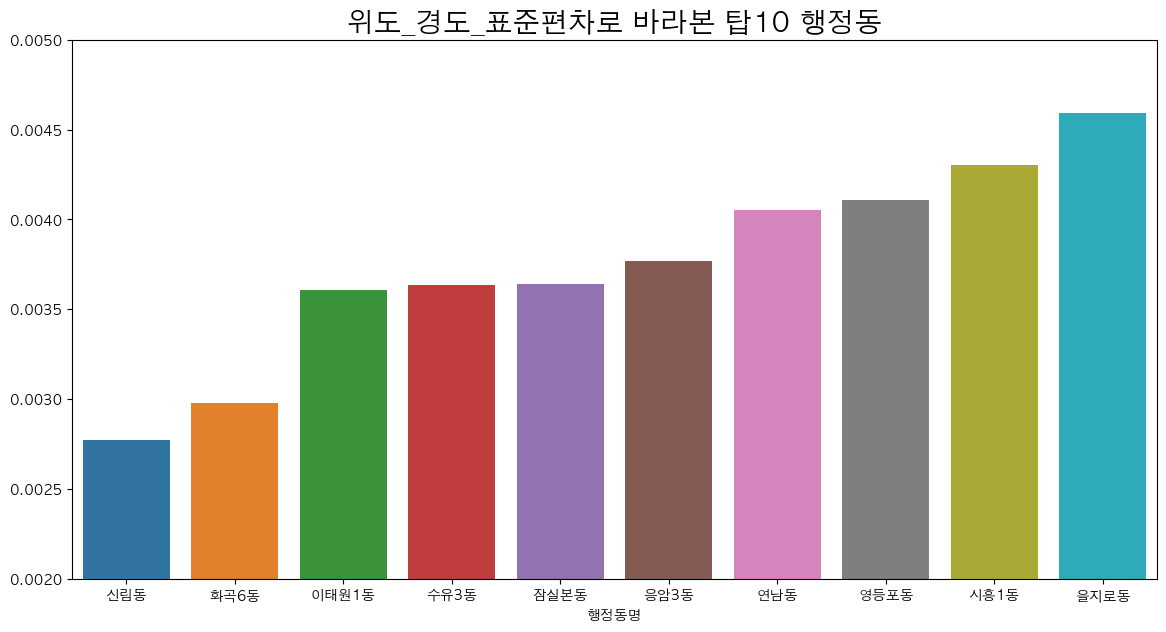

In [12]:
plt.figure(figsize=(14,7))
sns.barplot(data=tmp.reset_index().head(10),
            x='행정동명',
            y=0)
plt.title('위도_경도_표준편차로 바라본 탑10 행정동',fontsize=20)
plt.ylabel('')
plt.ylim([0.002,0.005])
plt.show()